# Community Detection Lab (week 2: modularity-based detection)

## Import of python-igraph library and graph loading

In [1]:
# Import python-igraph library
import igraph
from IPython.display import Image

# Note: email graph is too large for the fast execution of the  Girvan-Newman method, so we use karate graph,
# which is available on github and was taken from http://www.cise.ufl.edu/research/sparse/matrices/Newman/karate.html
gname = 'karate'
with open(gname + '.ncol', 'r') as finp:
    g = igraph.Graph.Read_Ncol(finp, weights=False, directed=False)
igraph.summary(g)

IGRAPH UN-- 34 78 -- 
+ attr: name (v)


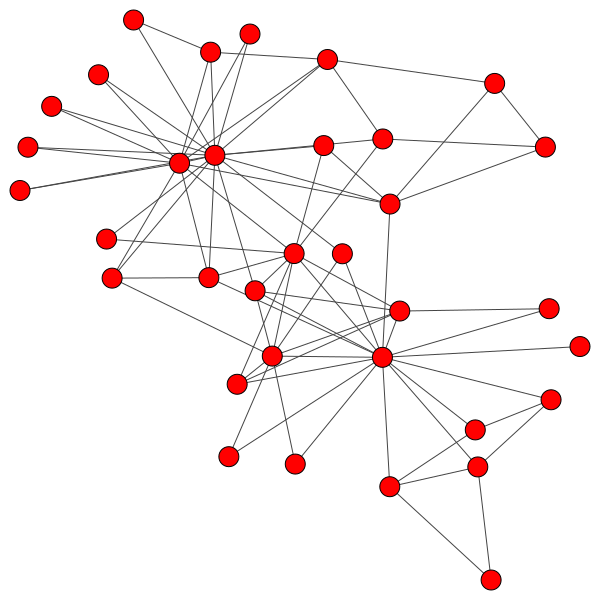

In [2]:
# Visualize the input graph into karate.png
gimg = gname + '.png'
igraph.plot(g, target=gimg)
# Show the visualization
Image(filename=gimg)

## Task 5.1. Apply Girvan-Newman method

### Apply Girvan-Newman algorithm

In [3]:
# Cut dendogram at the level, which maximizes modularity (evaluated automatically)
vdr = g.community_edge_betweenness()
# Get clusters from the dendogram
vcs = vdr.as_clustering()

In [4]:
def printCommuns(vcs, aname):
    '''Print resulting communities
    
    vcs  - communities as the VertexClustering object
    aname  - name of the algorithm
    '''
    # Evaluate the number of detected communities (clusters) and their sizes
    csizes = vcs.sizes()
    # Evaluate resulting modularity
    Q = vcs.recalculate_modularity()
    # Show results
    print("Using {} clustering '{}' graph has modularity Q={}and contains {} communities of sizes: {}"
        .format(gname, aname, Q, len(csizes), ', '.join([str(sz) for sz in csizes])))

In [18]:
def visualizeCommuns(g, vcs, aname):
    '''Visualize communities
    
    g  - the graph to be visualized
    vcs  - communities as the VertexClustering object
    aname  - name of the algorithm
    
    return  - visualization of communities on the graph
    '''
    # Define distinct colors for the communities
    colors = ['red', 'yellow', 'blue', 'green', 'purple', 'cyan', 'black']
    # Assign colors to each vertex according to the cluster
    for icl, cl in enumerate(vcs):
        for v in cl:
            g.vs[v]['color'] = colors[icl]
    # Transform algorithm name to the file prefix
    fpref = '_'.join(aname.lower().split('-'))
    # Visualize detected communities on the input graph
    cgnimg = fpref + '_' + gname + ".png"
    print(cgnimg)
    igraph.plot(g, target=cgnimg)  # , vertex_size=6
    return Image(cgnimg)

Using karate clustering 'Girvan-Newman' graph has modularity Q=0.41978961209730437and contains 4 communities of sizes: 5, 11, 6, 12
girvan_newman_karate.png


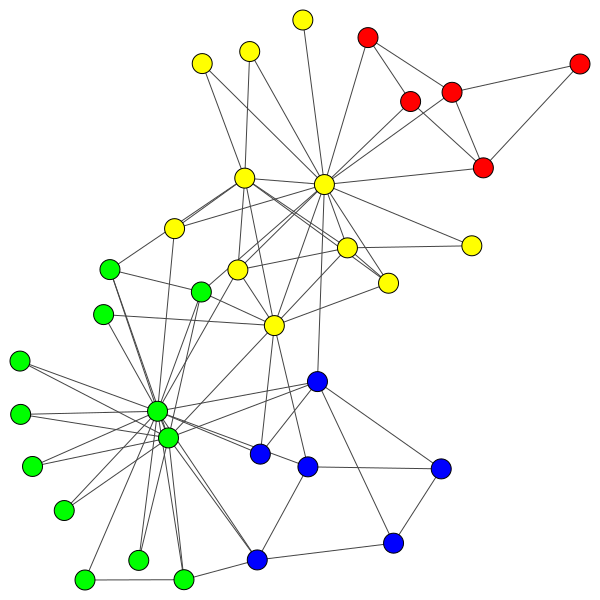

In [19]:
# Show results
aname = 'Girvan-Newman'
printCommuns(vcs, aname)
visualizeCommuns(g, vcs, aname)

### Apply available Girvan-Newman algorithm and compare results

In [7]:
# Get communities (clusters) corresponding to the best modularity (top level of the built hierarchy)
vcs = g.community_multilevel()

Using karate clustering 'Louvain' graph has modularity Q=0.41978961209730437and contains 4 communities of sizes: 5, 11, 6, 12
louvain_karate.png


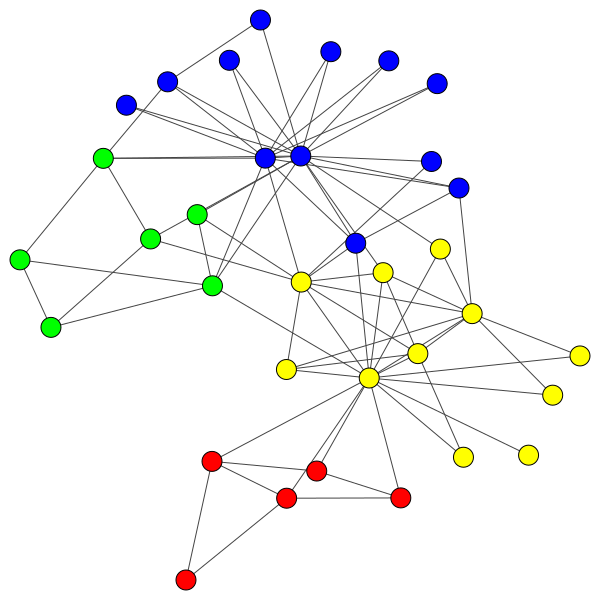

In [8]:
# Show results
aname = 'Louvain'
printCommuns(vcs, aname)
visualizeCommuns(g, vcs, aname)